## ✈️ Exploratory Data Analysis of Flight Price Dataset

### 📌 Features Description

The features of the cleaned dataset are described below:

1. **Airline**: Name of the airline company. It is a categorical feature with 6 unique airlines.

2. **Flight**: Flight code representing the specific aircraft service. It is a categorical feature.

3. **Source City**: The city from which the flight departs. It is a categorical feature with 6 unique cities.

4. **Departure Time**: A derived categorical feature created by grouping departure times into time intervals (bins). It contains 6 distinct time categories.

5. **Stops**: A categorical feature indicating the number of stops between source and destination cities. It has 3 distinct values.

6. **Arrival Time**: A derived categorical feature created by grouping arrival times into time intervals. It contains 6 distinct time categories.

7. **Destination City**: The city where the flight arrives. It is a categorical feature with 6 unique cities.

8. **Class**: Seat class of the flight (Business or Economy). It is a categorical feature with 2 distinct values.

9. **Duration**: A continuous feature representing the total travel time (in hours).

10. **Days Left**: A derived numerical feature calculated as the difference between the journey date and booking date.

11. **Price**: The target variable representing the ticket price.

In [45]:
# importing basics libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
## importing Excel dataset

df = pd.read_excel('flight_price.xlsx')

In [47]:
## Showing dataset

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [48]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [49]:
## Summary of the dataset

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
dtypes: int64(1), str(10)
memory usage: 918.2 KB


In [50]:
## descriptive summary of the dataset

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [51]:
## Extracted day, month, and year from the 'Date_of_Journey' column to enable time-based analysis and improve model performance.

df['Date'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [52]:
## Drop Date of Journey

df.drop('Date_of_Journey', axis=1, inplace=True)

In [53]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [54]:
##Extracted only the arrival time by removing extra time zone details.

df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [55]:
## Extracted Hour and Mins from the 'Arrival_Time' column to enable time-based analysis and improve model performance.

df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Mins'] = df['Arrival_Time'].str.split(':').str[1].astype(int)

In [56]:
## Drop Arrival_Time

df.drop('Arrival_Time', axis=1, inplace=True)

In [57]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [58]:
## Extracted Hour and Mins from the 'Dep_Time' column to enable time-based analysis and improve model performance.

df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Mins'] = df['Dep_Time'].str.split(':').str[1].astype(int)

In [59]:
## Drop Dep Time

df.drop('Dep_Time', axis=1, inplace=True)

In [60]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Mins,Dep_Hour,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [61]:
## Checked unique values in 'Total_Stops' to understand distinct stop categories.

df['Total_Stops'].unique()

<StringArray>
['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']
Length: 6, dtype: str

In [62]:
## Filtered rows with missing values in 'Total_Stops' to inspect and handle null entries.

df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Mins,Dep_Hour,Dep_Mins
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [63]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stop':2, '3 stop':3, '4 stop':4,}).fillna(1)

In [64]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Mins,Dep_Hour,Dep_Mins


In [65]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Mins,Dep_Hour,Dep_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,1.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


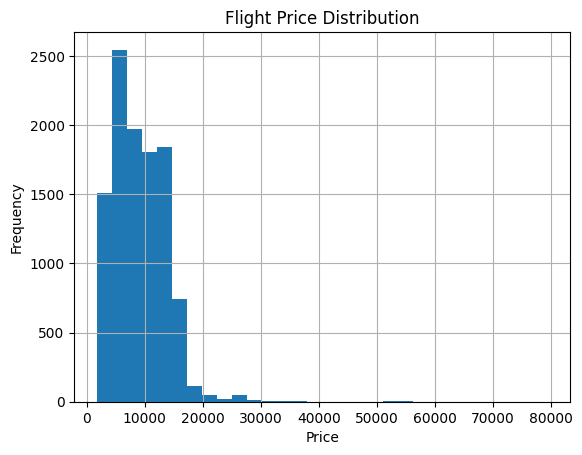

In [66]:
## Price Distribution
## Majority of flights are moderately priced, with few expensive outliers.

plt.figure()
df['Price'].hist(bins=30)
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

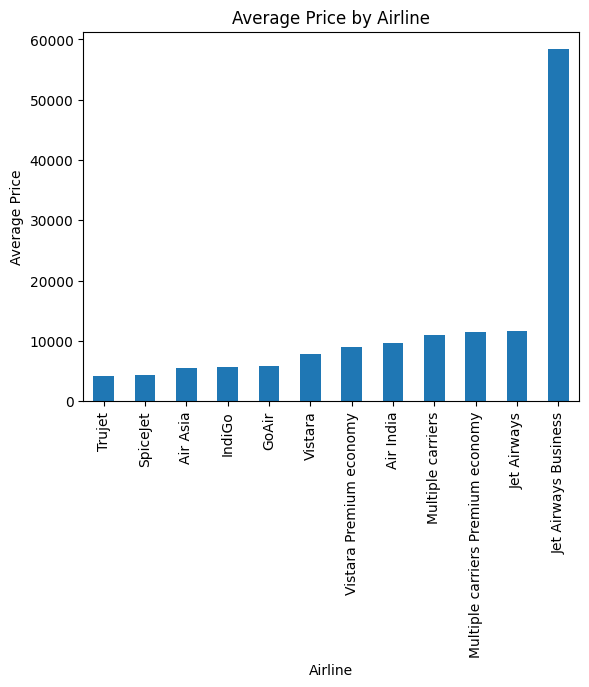

In [67]:
## Average Price by Airline
## Airline X has the highest average price, indicating premium positioning in the market.

plt.figure()
df.groupby('Airline')['Price'].mean().sort_values().plot(kind='bar')
plt.title("Average Price by Airline")
plt.ylabel("Average Price")
plt.show()

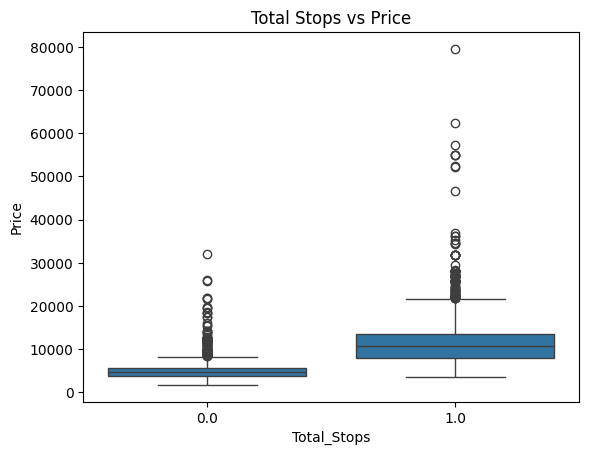

In [68]:
## Total Stops vs Price
## Convenience (non-stop flights) comes at a higher cost.

plt.figure()
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title("Total Stops vs Price")
plt.show()

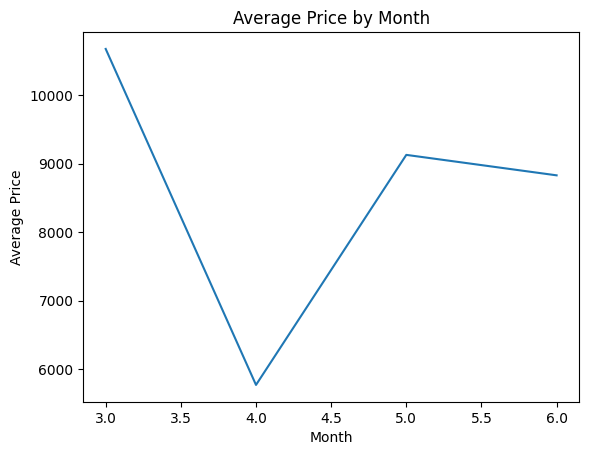

In [69]:
## Monthly Price Trend
## Price fluctuations indicate demand-driven pricing patterns.

plt.figure()
df.groupby('Month')['Price'].mean().plot()
plt.title("Average Price by Month")
plt.ylabel("Average Price")
plt.show()

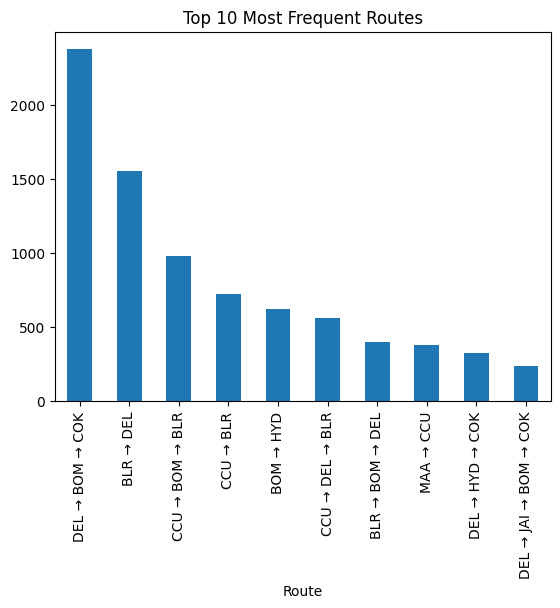

In [70]:
## Top 10 Routes
## Popular routes represent high-demand corridors in the aviation network.

top_routes = df['Route'].value_counts().head(10)

plt.figure()
top_routes.plot(kind='bar')
plt.title("Top 10 Most Frequent Routes")
plt.show()

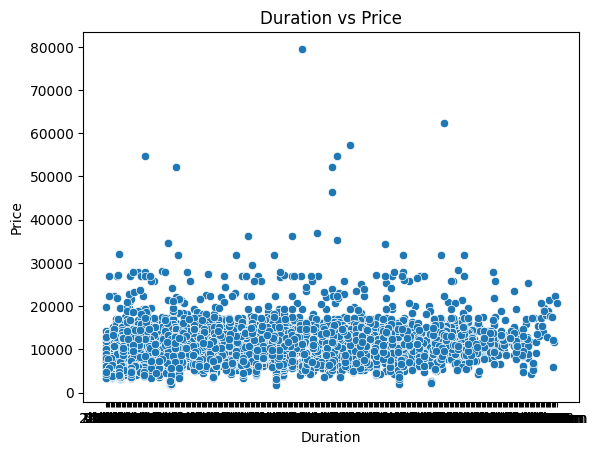

In [71]:
## Duration vs Price
## Price is influenced not only by duration but also by airline brand and route demand.

plt.figure()
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title("Duration vs Price")
plt.show()

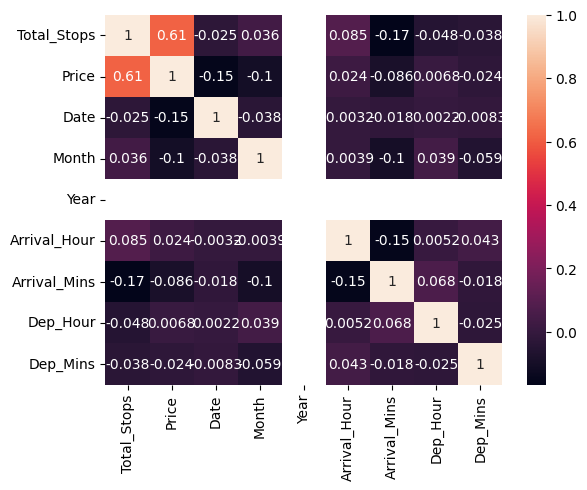

In [72]:
## Correlation Heatmap
## Duration and total stops show noticeable influence on ticket pricing, making them strong candidates for predictive modeling.

numeric_df = df.corr(numeric_only=True)

plt.figure()
sns.heatmap(numeric_df, annot=True)
plt.show()

## 📌 Final Conclusion

In this project, a comprehensive Exploratory Data Analysis (EDA) was performed on the flight price dataset to identify key factors influencing ticket pricing.

The dataset was first cleaned by handling missing values and correcting data types. Feature engineering techniques were applied, including extraction of day, month, and year from the journey date, and transformation of categorical variables such as total stops into numerical format. Time-related features like arrival time were also processed for better analysis.

Through visualization and statistical analysis, the following key insights were identified:

- Non-stop flights are generally more expensive compared to flights with multiple stops.
- Ticket prices tend to increase with flight duration.
- Certain airlines operate in a premium pricing segment.
- Seasonal and monthly trends significantly impact flight prices.
- Total stops and duration show noticeable correlation with ticket price, making them strong predictors.

Overall, this analysis demonstrates that flight pricing is influenced by multiple factors including airline type, number of stops, journey duration, and seasonal demand. These insights can help airlines optimize pricing strategies and assist customers in making cost-effective travel decisions.